In [194]:
import scipy as sci
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import norm

In [195]:
points=10000 #Number of points 
x=np.zeros((points,3)) #To store x-coordinates of sample points
y=np.zeros((points,3)) #To store y-coordinates of sample points

In [196]:
for i in range(points):
    vector=np.random.rand(1,3)-0.5
    if(np.linalg.norm(vector)!=0 and np.linalg.norm(vector)<=1.0):
        x[i,:]=vector
        y[i,:]=x[i,:]/np.linalg.norm(x[i,:])

In [197]:
y_norms=np.zeros(points) #Array to store norms of sample vectorsfor

In [198]:
for i in range(points):
    y_norms[i]=np.linalg.norm(y[i,:])
    tol=1e-10 #Tolerance
    norm_diff=abs(y_norms-1) #Diff. between actual and desired norm
    danger_array=y_norms[norm_diff>tol]

In [199]:
if(len(danger_array)==0): 
    print("All Clear")
else:
    print("Danger")

All Clear


In [200]:
def CheckSide(vertices,point):
    t1,t2,t3,t4=vertices
    p=point
    side_1=t2-t1
    side_2=t3-t1
    normal=np.cross(side_1,side_2)    
    ref_vector=t4-t1
    ref_sign=np.dot(normal,ref_vector)    
    point_vector=p-t1
    point_sign=np.dot(normal,point_vector)    
    if(np.sign(ref_sign)==np.sign(point_sign)):
        return 1
    else:
        return 0

In [201]:
def CheckTetrahedron(vertices,point):
    vert=np.copy(vertices)
    check_1=CheckSide(vert,point)    
    vert=np.roll(vert,1,axis=0)
    check_2=CheckSide(vert,point)    
    vert=np.roll(vert,1,axis=0)
    check_3=CheckSide(vert,point)    
    vert=np.roll(vert,1,axis=0)
    check_4=CheckSide(vert,point)    
    sum_check=check_1+check_2+check_3+check_4    
    if(sum_check==4.):
        return 1
    else:
        return 0

In [202]:
centre=[0,0,0]
number_of_samples=10000
sample_span=np.arange(0,number_of_samples,1)
check_point=np.zeros(number_of_samples) 
prob=np.zeros(number_of_samples)

In [203]:
for i in range(number_of_samples):
    indices=np.random.randint(0,points,4)
    vertex_list=y[indices]
    check_point[i]=CheckTetrahedron(vertex_list,centre)
    prob[i]=len(check_point[check_point==1.])/(i+1)

Text(0.5, 1.0, 'Variation of resultant probability with increase in the number of iterations')

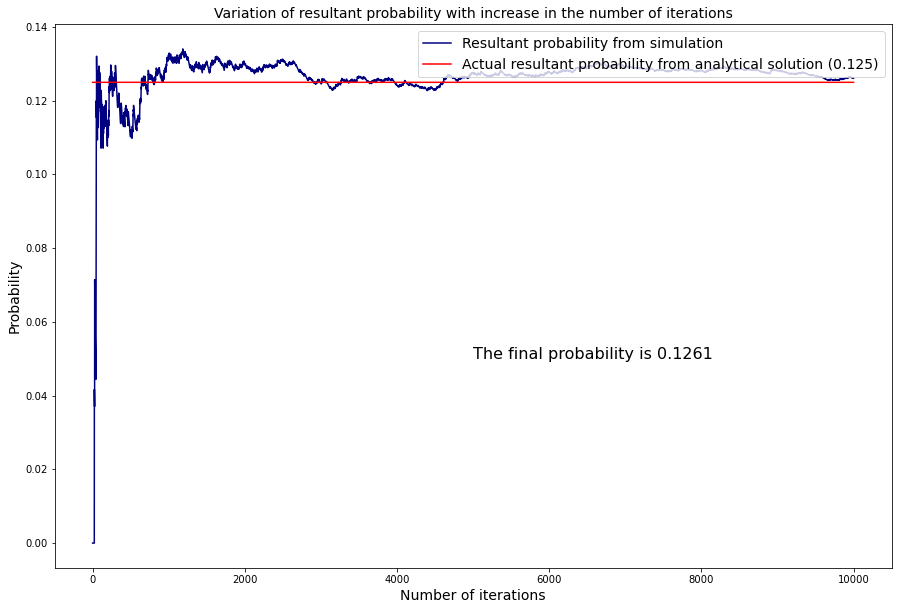

In [204]:
#Plot blank figure
plt.figure(figsize=(15,10))
#Plot resultant probability from simulation
plt.plot(sample_span,prob,color="navy",linestyle="-",label="Resultant probability from simulation")

#Plot resultant probability from analytical solution
plt.plot(sample_span,[0.125]*len(sample_span),color="red",linestyle="-",label="Actual resultant probability from analytical solution (0.125)")
#Plot value of final resultant probability in text
plt.text(sample_span[int(number_of_samples/2)],0.05,f"The final probability is {prob[-1]:.4f}",fontsize=16)
#Display axis labels
plt.xlabel("Number of iterations",fontsize=14)
plt.ylabel("Probability",fontsize=14)
#Display legend
plt.legend(loc="upper right",fontsize=14)
#Display title of the plot
plt.title("Variation of resultant probability with increase in the number of iterations",fontsize=14)